In [2]:
import numpy
import tensorflow as tf
from tensorflow import keras
#from keras.datasets import imdb
import matplotlib.pyplot as plt
# load the dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

In [3]:
print("Training data: ")
print(X.shape)
print(y.shape)

print("Classes: ")
print(numpy.unique(y))


Training data: 
(50000,)
(50000,)
Classes: 
[0 1]


Review length: 
Mean 234.76 words (172.911495)


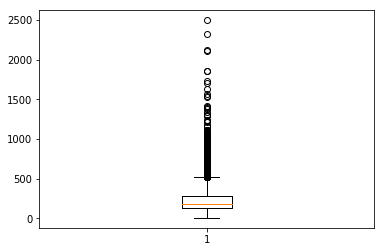

In [4]:

print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

In [5]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=500)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=500)


In [6]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data(num_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_words)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_words)

In [16]:
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 100, input_length=max_words))
model.add(keras.layers.Conv1D(filters=100, kernel_size=(3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling1D(pool_size=2))

model.add(keras.layers.Conv1D(filters=100, kernel_size=(4), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling1D(pool_size=2))

model.add(keras.layers.Conv1D(filters=100, kernel_size=(5), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling1D(pool_size=2))

#model.add(keras.layers.LSTM(100))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
#model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 100)          50000     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 500, 100)          30100     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 250, 100)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 250, 100)          40100     
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 125, 100)          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 125, 100)          50100     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 62, 100)           0         
__________

In [17]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=50,verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 [==============================] - 19s 758us/step - loss: 7.8207 - acc: 0.4992 - val_loss: 7.9713 - val_acc: 0.5000
Epoch 2/20
25000/25000 [==============================] - 18s 736us/step - loss: 7.9857 - acc: 0.4992 - val_loss: 7.9713 - val_acc: 0.5000
Epoch 3/20
25000/25000 [==============================] - 18s 735us/step - loss: 7.9743 - acc: 0.4999 - val_loss: 7.9713 - val_acc: 0.5000
Epoch 4/20
14750/25000 [================>.............] - ETA: 5s - loss: 8.0203 - acc: 0.4970

KeyboardInterrupt: 

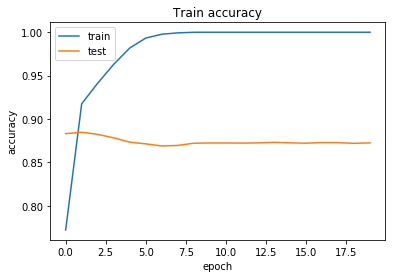

In [13]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Train accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
